Name: A Rahul  
Reg. No.: 20BRS1102

In [1]:
cd /content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 08 - 16 02 23

/content/drive/MyDrive/20BRS1102 Deep Learning Lab/Lab 08 - 16 02 23


# Question 1: Deeplizard CNN Playground

https://deeplizard.com/resource/pavq7noze2

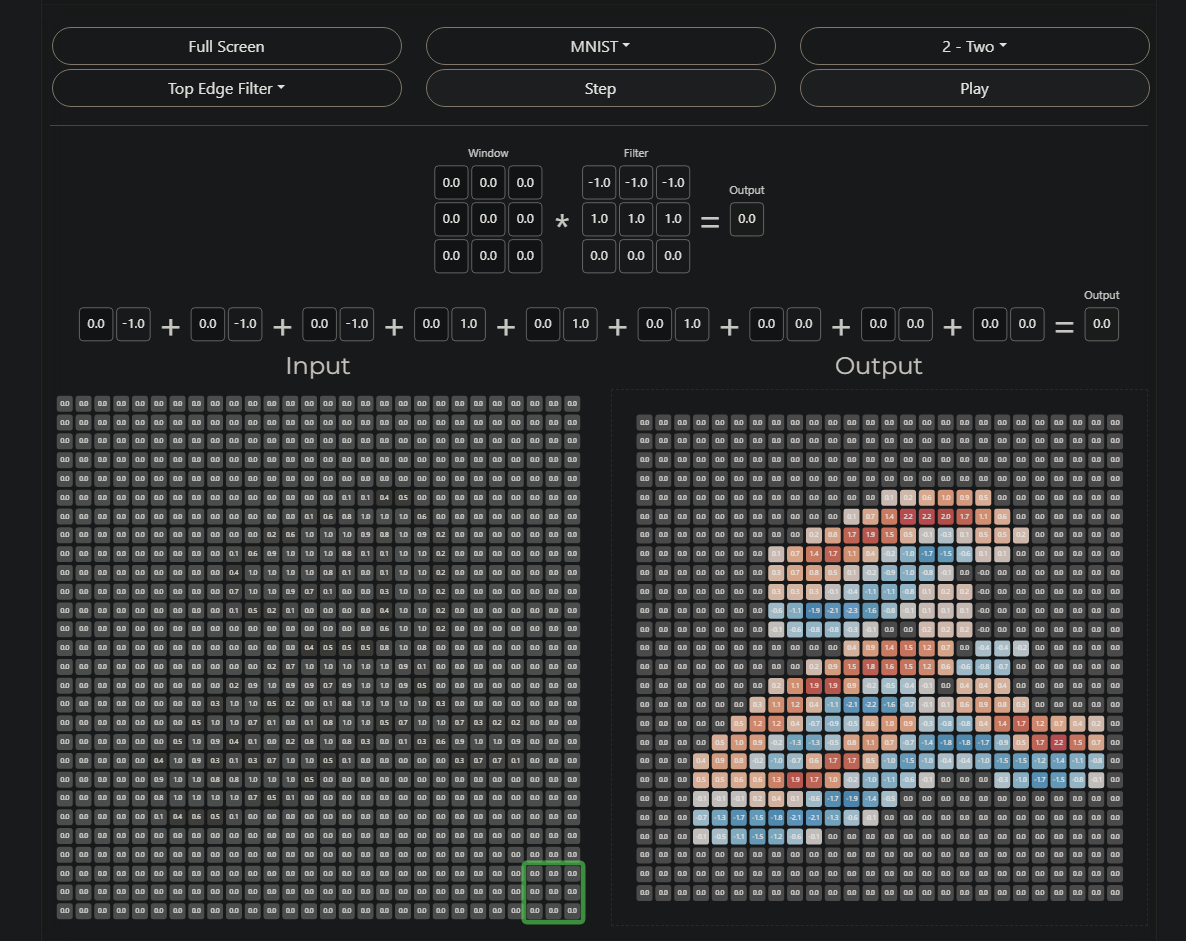

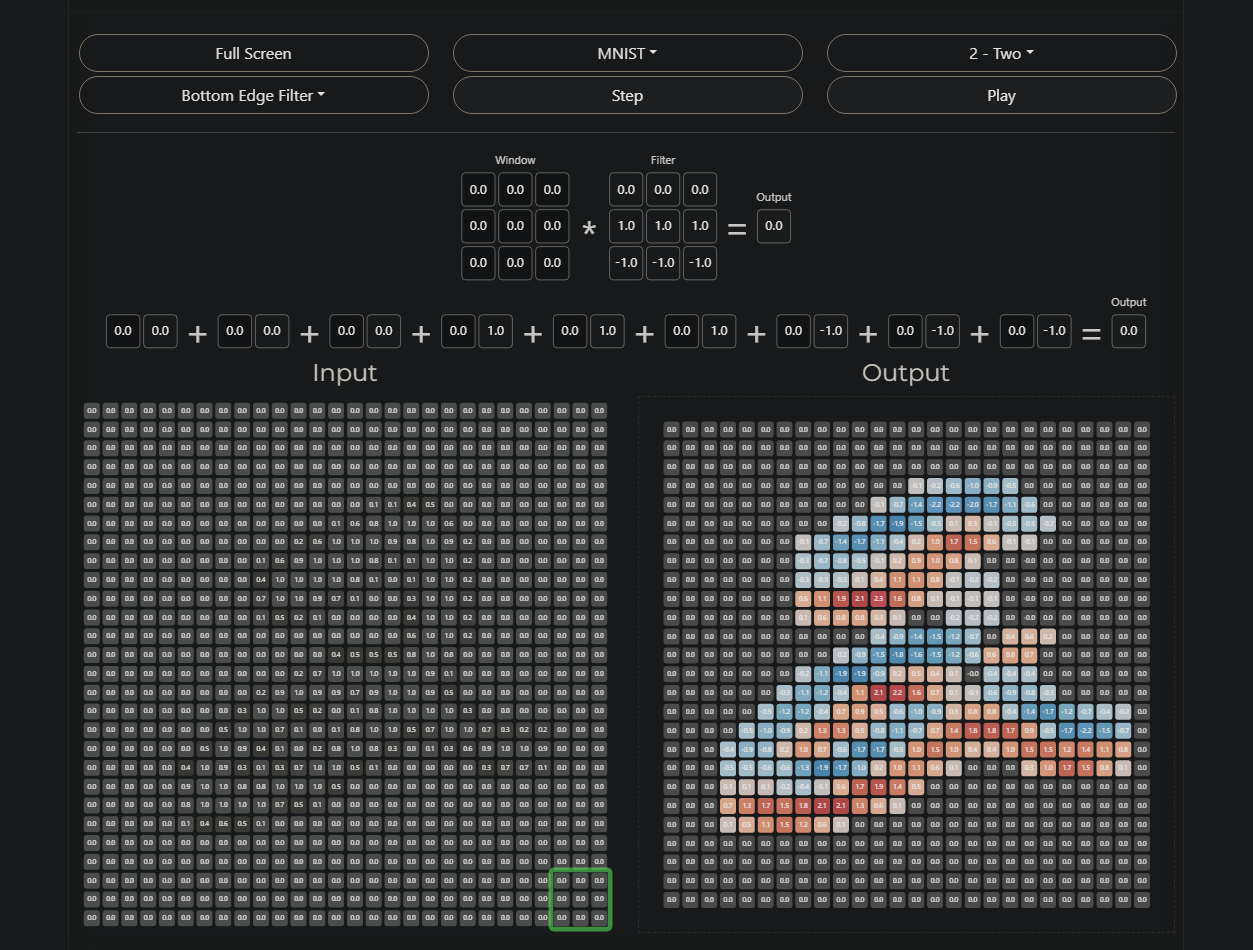

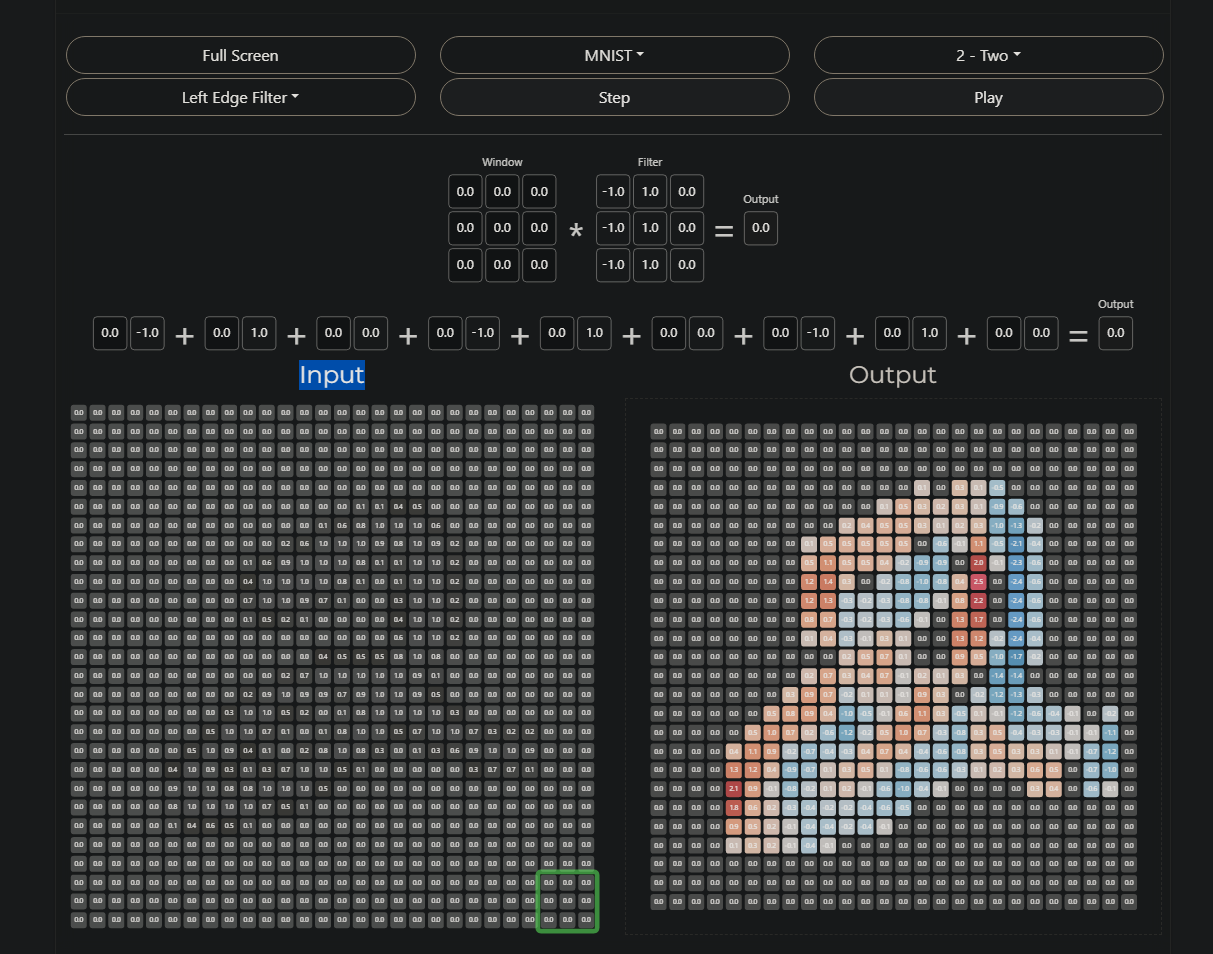

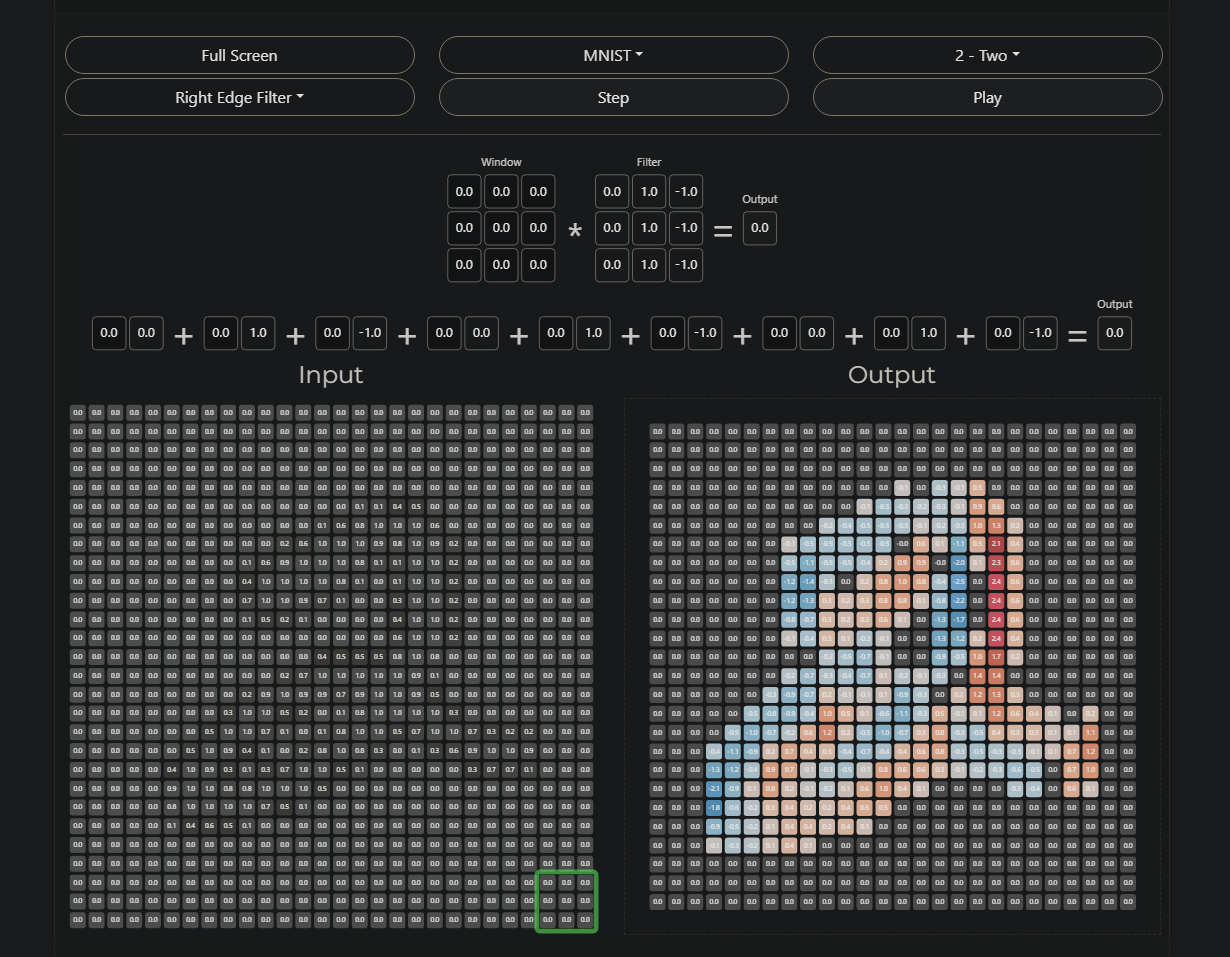

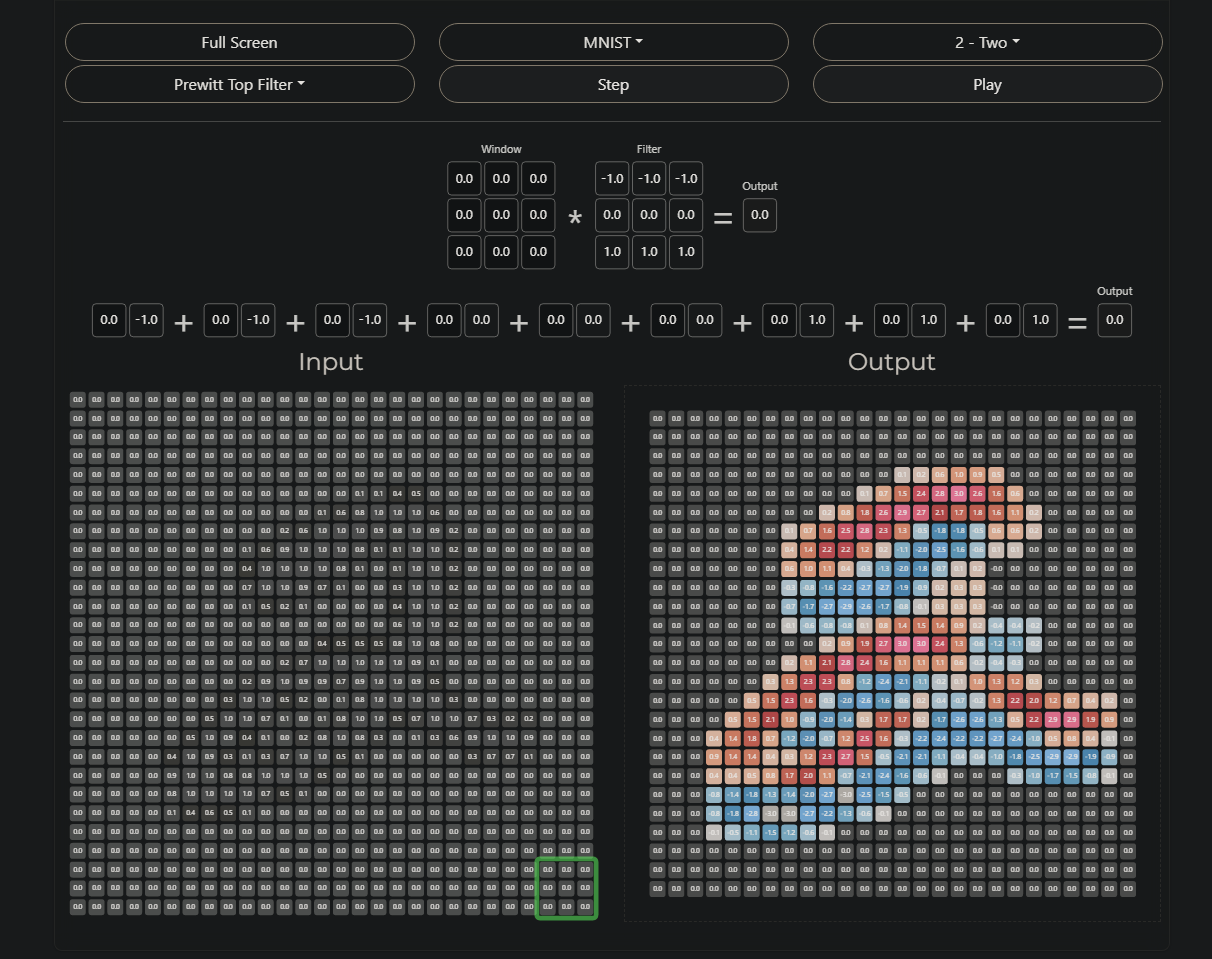

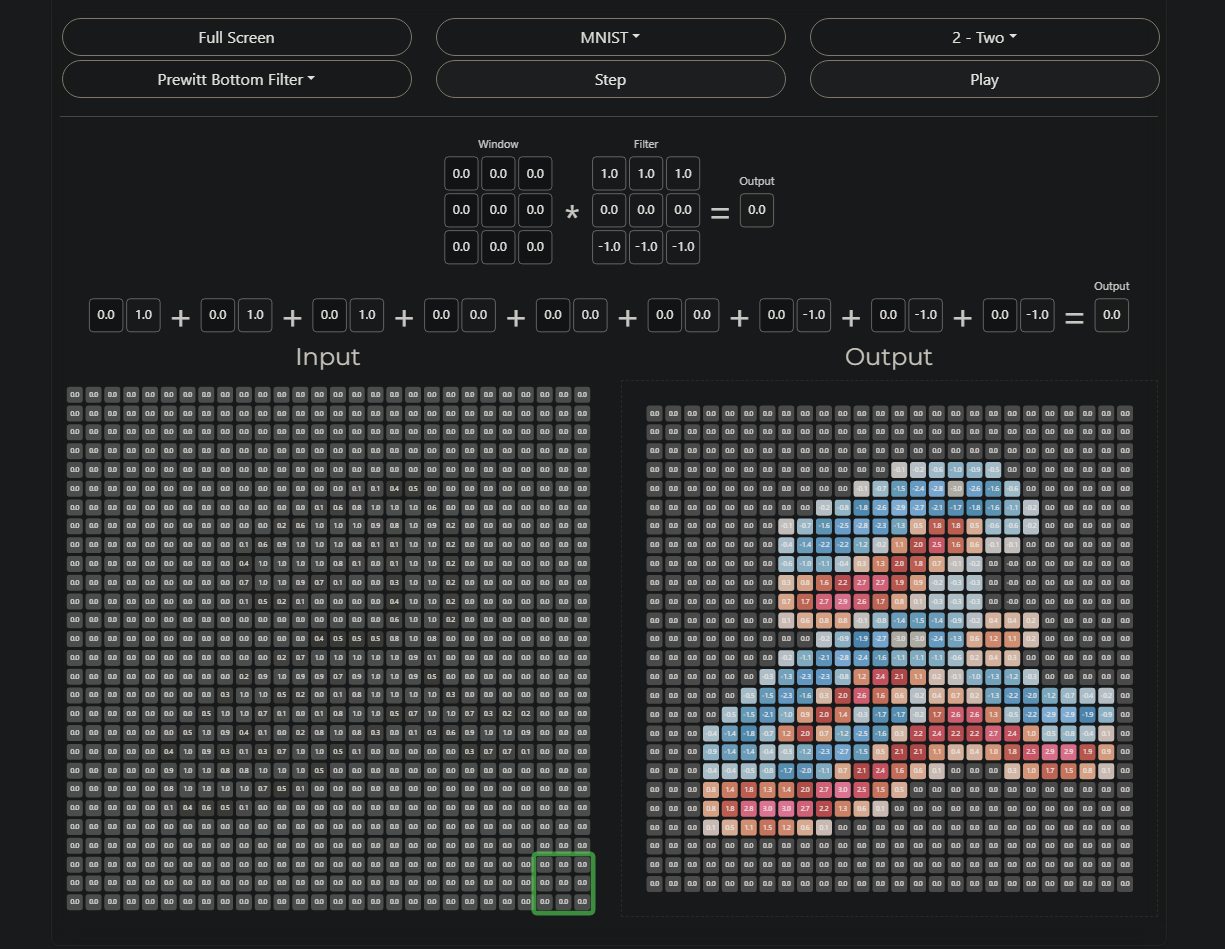

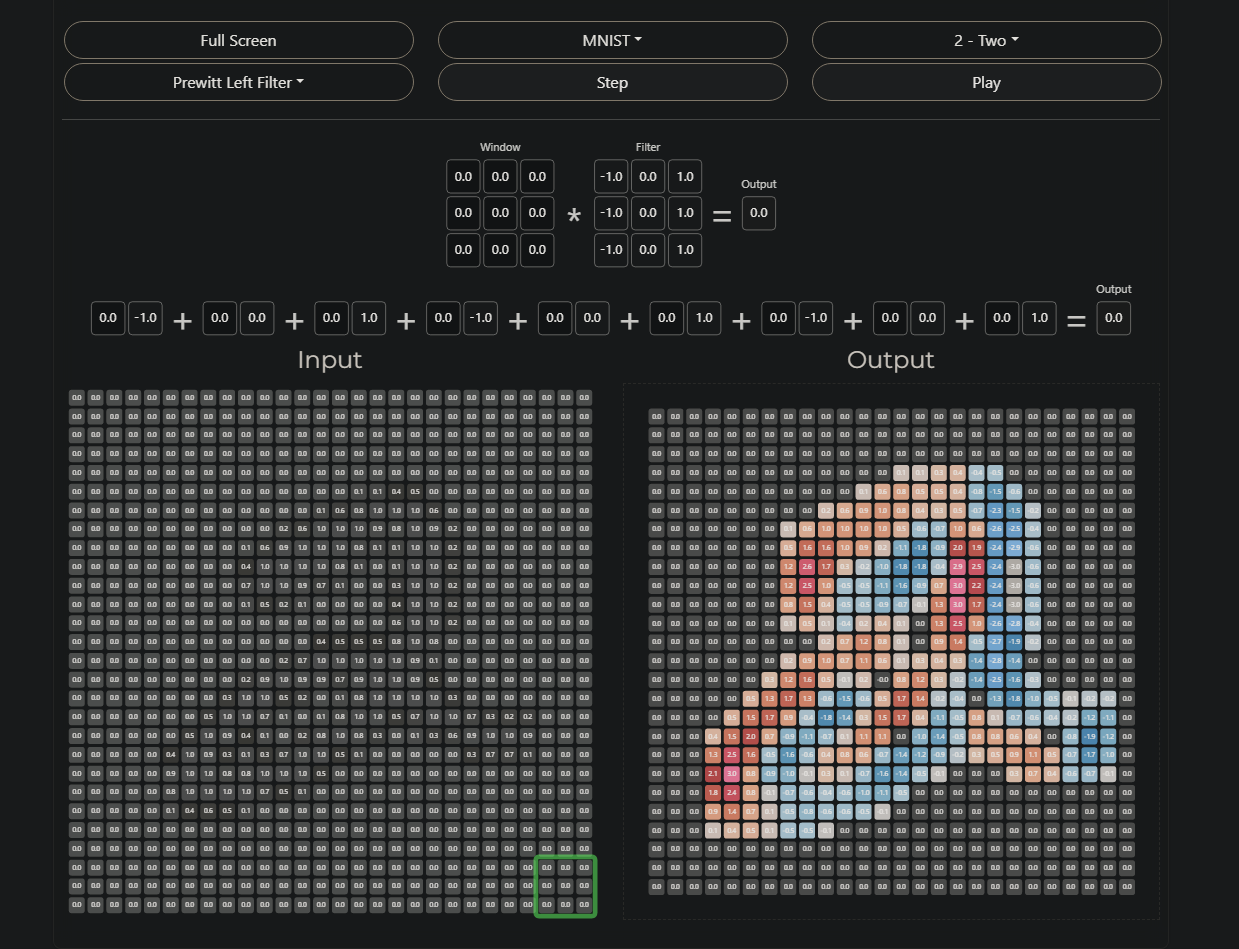

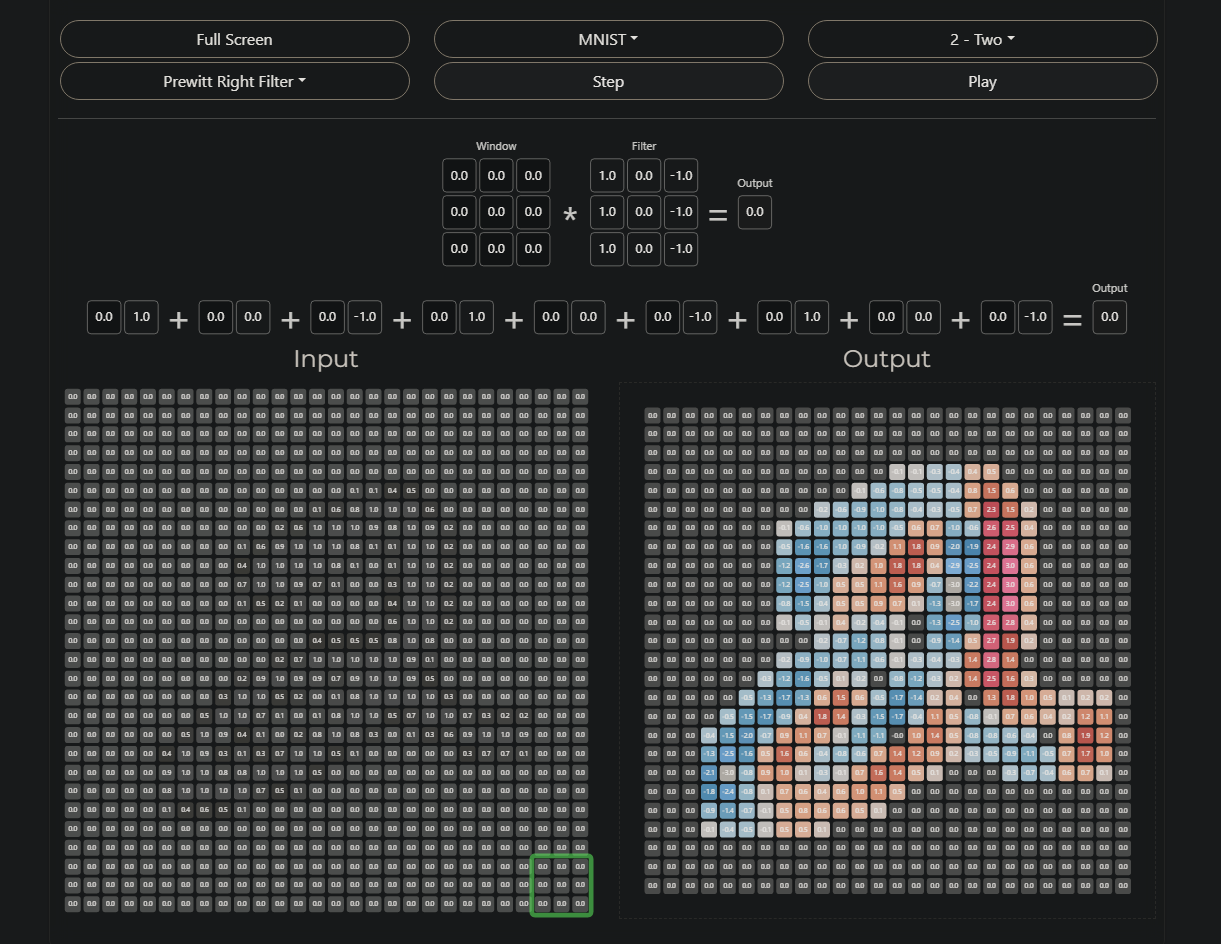

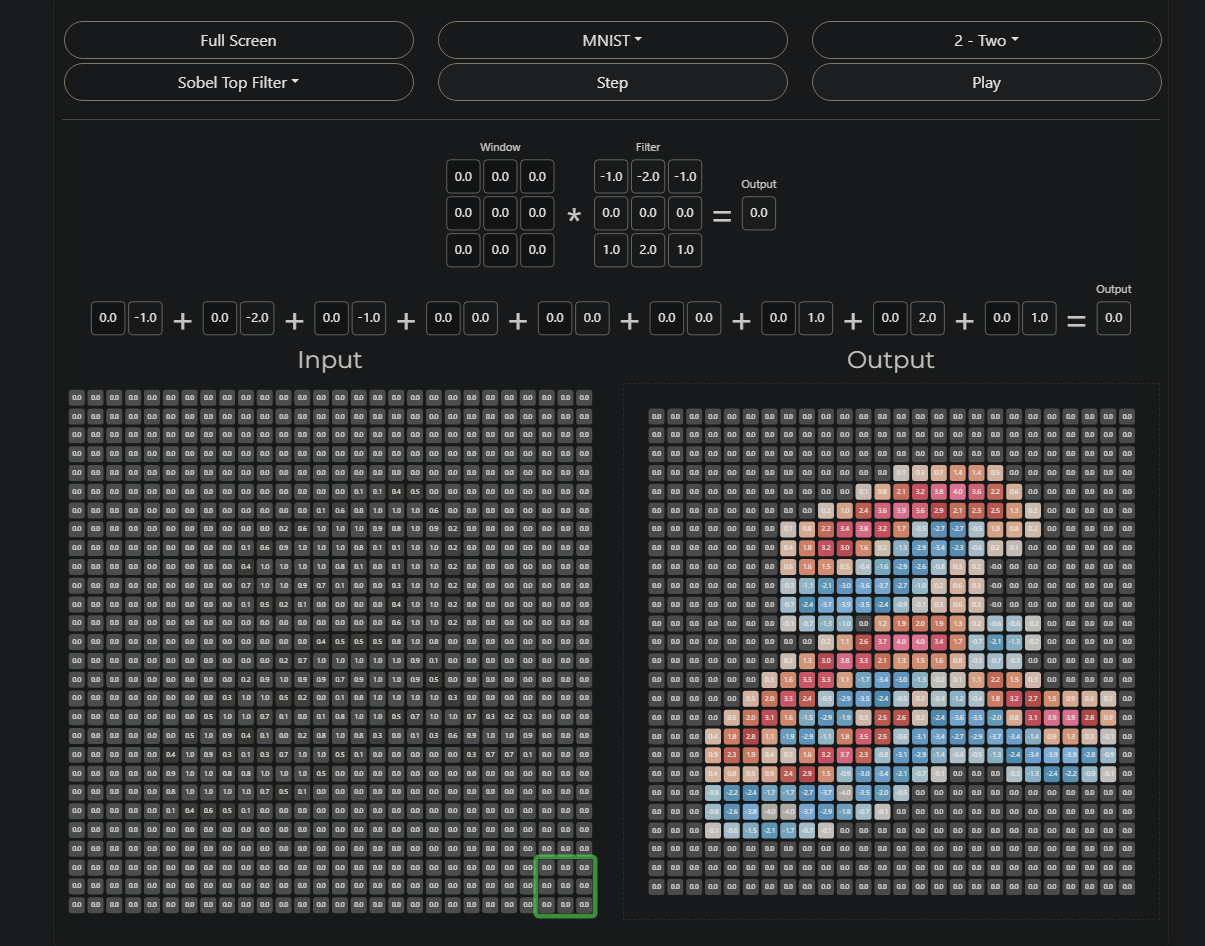

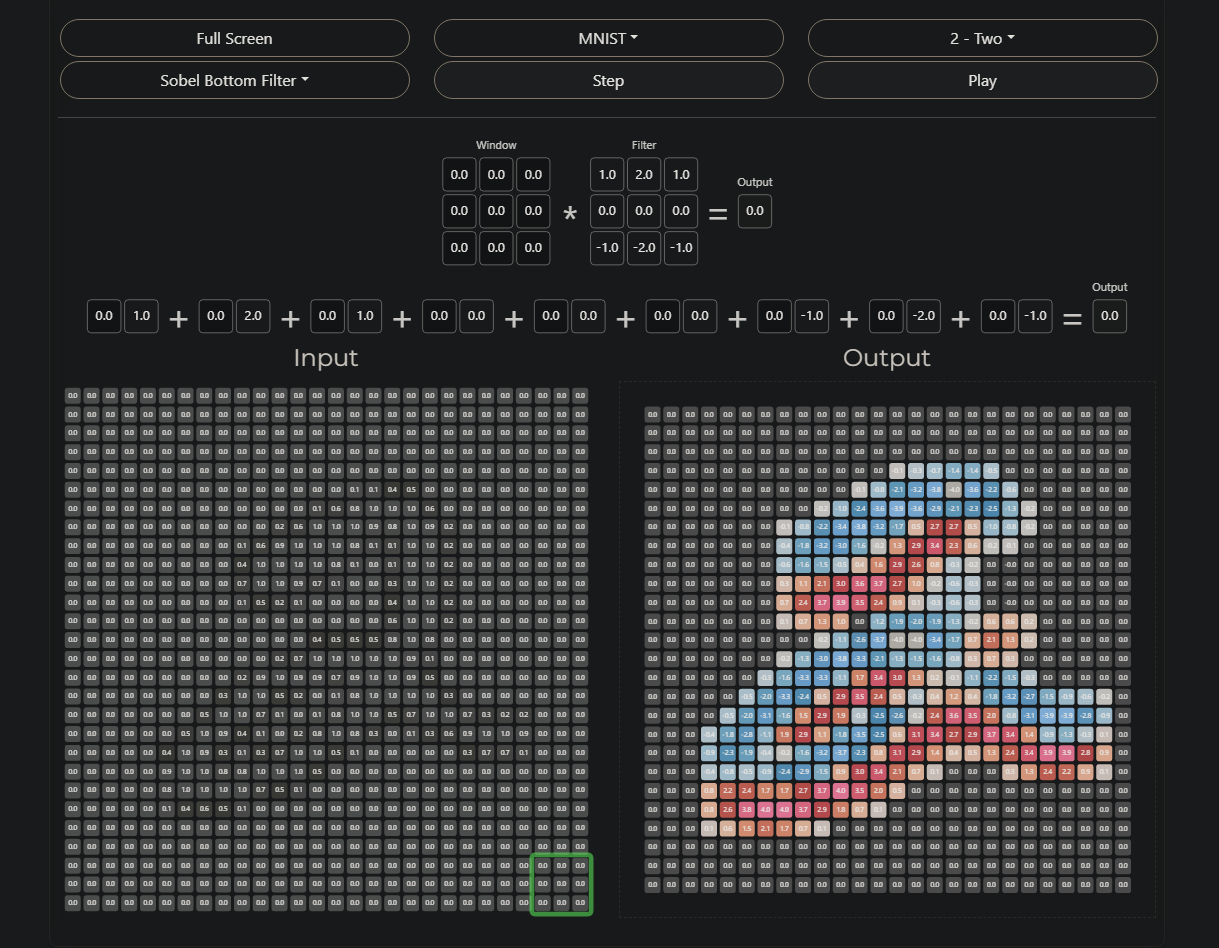

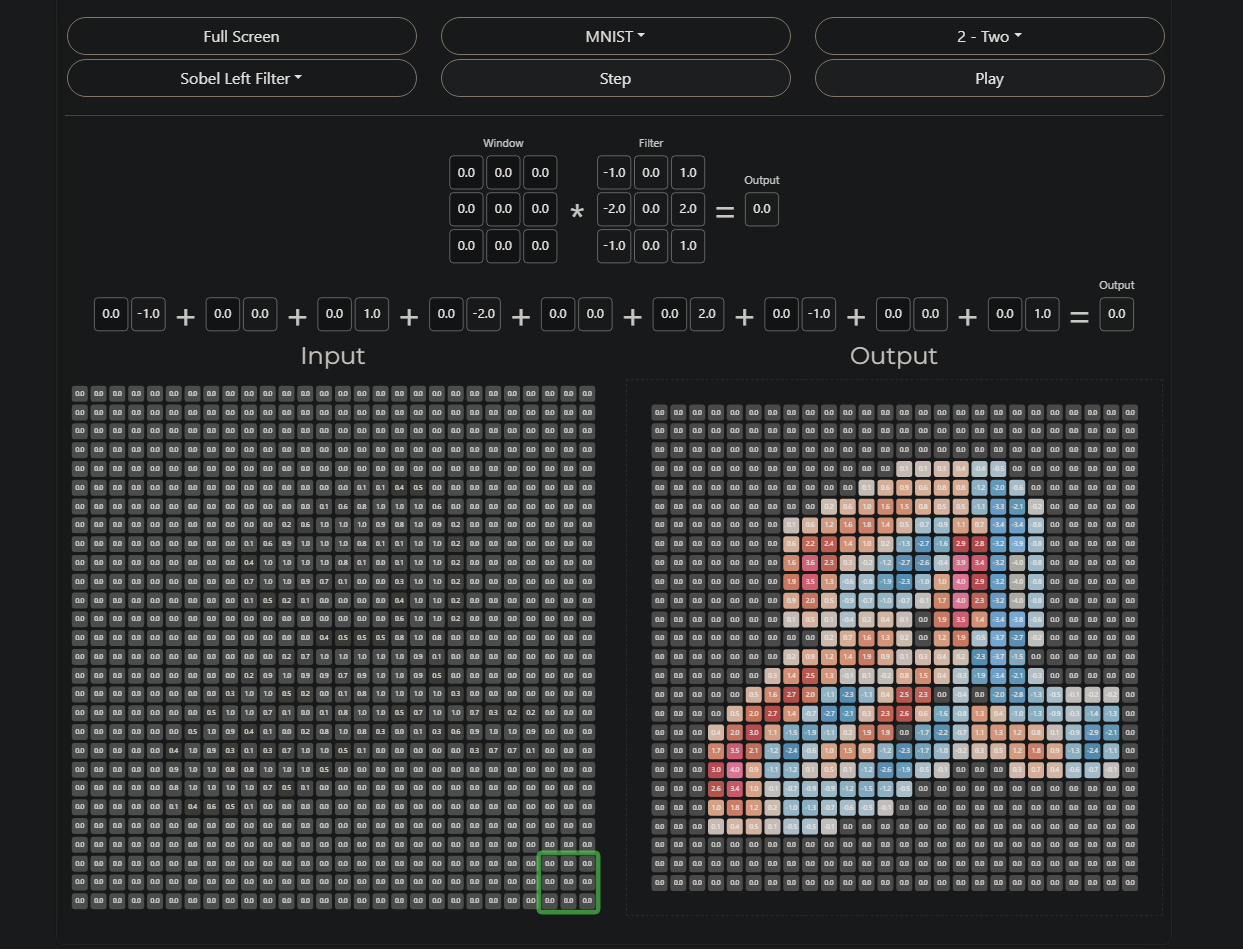

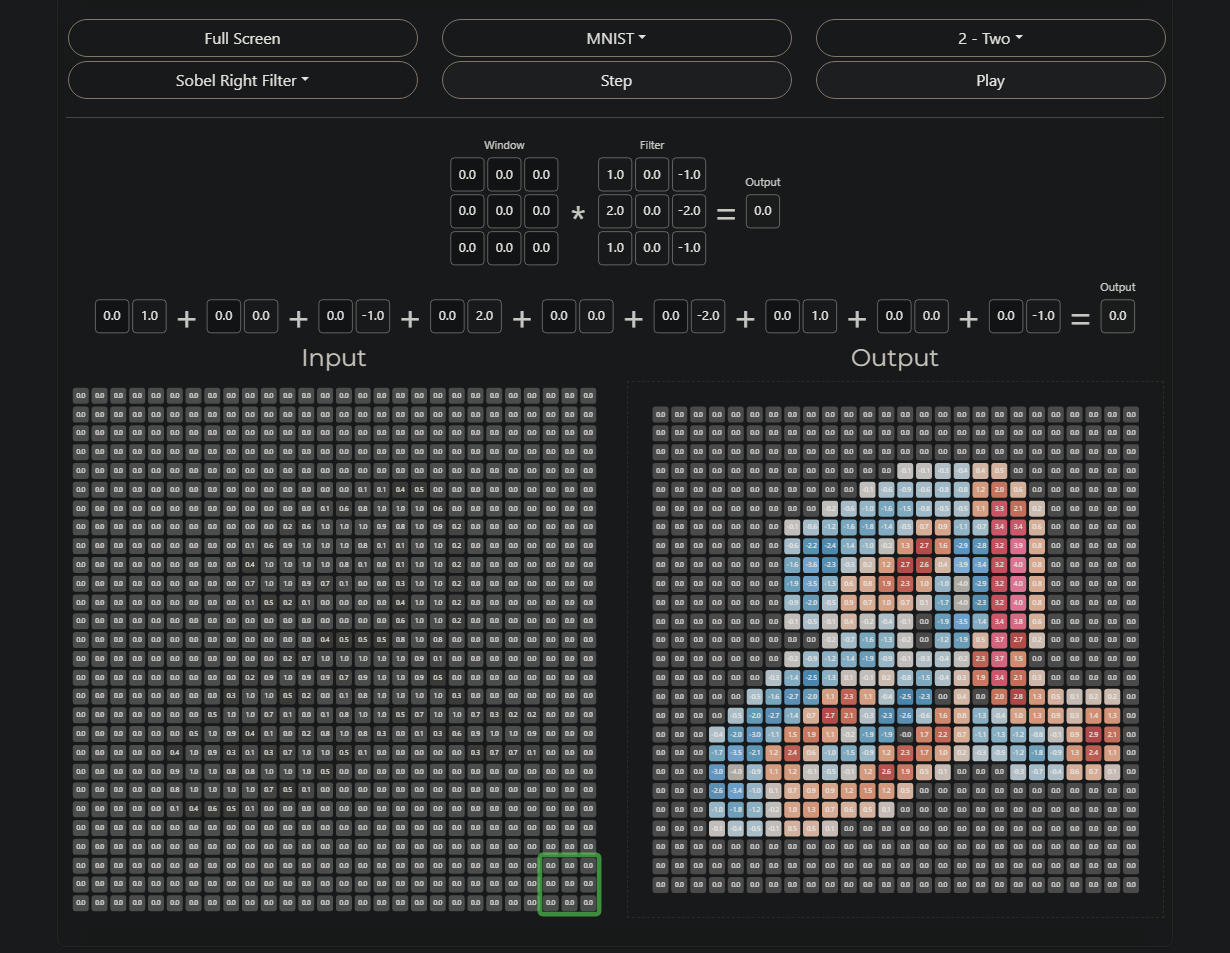

# Question 2: Visualizing Filters In A CNN

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [2]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


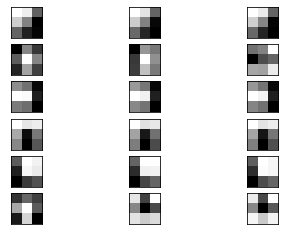

In [3]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

For bird.jpg

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 108ms/step


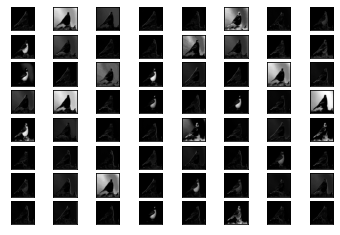

In [4]:
# plot feature map of first conv layer for given image
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

1/1 [==============================] - 1s 613ms/step


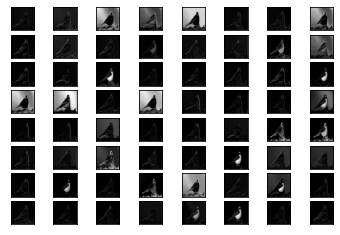

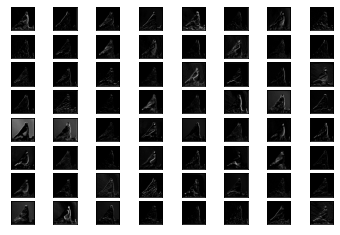

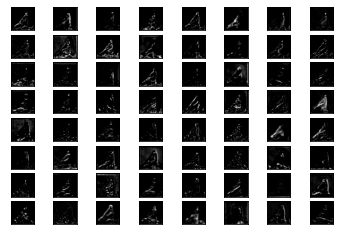

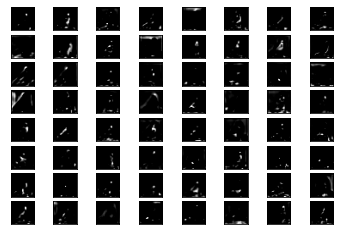

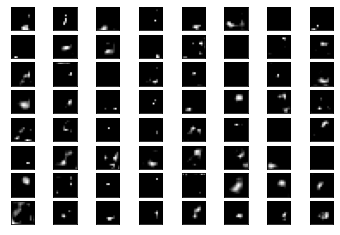

In [5]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

# Question 3: Alexnet On CIFAR10

https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [7]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [8]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

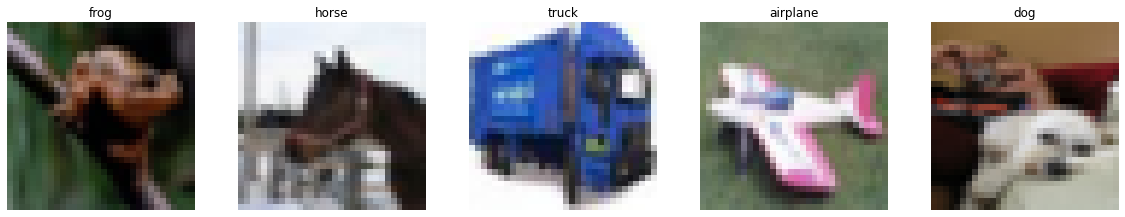

In [11]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [12]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 100x100
    image = tf.image.resize(image, (100,100))
    return image, label

In [13]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [14]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [18]:
model.fit(train_ds,
          epochs=2,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])

Epoch 1/2
1406/1406 [==============================] - 1717s 1s/step - loss: 1.6060 - accuracy: 0.4371 - val_loss: 1.1829 - val_accuracy: 0.5795
Epoch 2/2
1406/1406 [==============================] - 1644s 1s/step - loss: 1.1251 - accuracy: 0.6008 - val_loss: 0.9594 - val_accuracy: 0.6663


In [20]:
model.evaluate(test_ds)

312/312 [==============================] - 84s 255ms/step - loss: 1.0045 - accuracy: 0.6480


[1.004529356956482, 0.6480368375778198]

# Question 4: Custom CNN Model On Any Dataset

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Set the parameters for your CNN model
input_shape = (28, 28, 1)
num_classes = 10
dropout_rate = 0.2

# Preprocess your images
x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert your labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create a data generator for preprocessing your images
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
train_datagen.fit(x_train)

# Build your CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile your CNN model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your CNN model
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test))

# Evaluate your CNN model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.8140 - accuracy: 0.6956 - val_loss: 0.5734 - val_accuracy: 0.7822
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.5873 - accuracy: 0.7770 - val_loss: 0.4992 - val_accuracy: 0.8095
Epoch 3/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.5170 - accuracy: 0.8067 - val_loss: 0.4345 - val_accuracy: 0.8447
Epoch 4/5
1875/1875 [==============================] - 83s 45ms/step - loss: 0.4756 - accuracy: 0.8249 - val_loss: 0.4505 - val_accuracy: 0.8278
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.3851 - accuracy: 0.8608
Test loss: 0.38513946533203125
Test accuracy: 0.86080002784729


# Question 5: Compare Your Developed CNN With A Fully Connected Neural Network

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Set the parameters for your CNN model
input_shape = (28, 28, 1)
num_classes = 10
dropout_rate = 0.2

# Preprocess your images
x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_test = x_test.reshape(x_test.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert your labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Create a data generator for preprocessing your images
train_datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
train_datagen.fit(x_train)

# Build your ANN model
ann_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile your ANN model
ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your CNN model
history = ann_model.fit(train_datagen.flow(x_train, y_train, batch_size=32), epochs=5, validation_data=(x_test, y_test))

# Evaluate your CNN model on the test set
test_loss, test_acc = ann_model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.8200 - accuracy: 0.6884 - val_loss: 0.5764 - val_accuracy: 0.7886
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6587 - accuracy: 0.7511 - val_loss: 0.5722 - val_accuracy: 0.7847
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6172 - accuracy: 0.7656 - val_loss: 0.5185 - val_accuracy: 0.8006
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5895 - accuracy: 0.7759 - val_loss: 0.4943 - val_accuracy: 0.8097
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4841 - accuracy: 0.8172
Test loss: 0.4841378927230835
Test accuracy: 0.8172000050544739


We can see that the custom CNN model has significantly more accuracy than the custom ANN model

However, the training time for the custom ANN model is significantly lesser than the custom CNN model. This might be attributed to the number of convolutions that are to be done in the CNN.

# Question 6: LeNet (also do it using ReLU)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the input data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the input data
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the LeNet model
model = keras.Sequential(
    [
        layers.Conv2D(filters=6, kernel_size=5, activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=16, kernel_size=5, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(units=120, activation="relu"),
        layers.Dense(units=84, activation="relu"),
        layers.Dense(units=10, activation="softmax"),
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
938/938 [==============================] - 30s 31ms/step - loss: 0.5988 - accuracy: 0.7783 - val_loss: 0.4607 - val_accuracy: 0.8344
Epoch 2/10
938/938 [==============================] - 28s 29ms/step - loss: 0.3983 - accuracy: 0.8565 - val_loss: 0.4070 - val_accuracy: 0.8526
Epoch 3/10
938/938 [==============================] - 29s 31ms/step - loss: 0.3509 - accuracy: 0.8719 - val_loss: 0.3712 - val_accuracy: 0.8643
Epoch 4/10
938/938 [==============================] - 29s 30ms/step - loss: 0.3246 - accuracy: 0.8817 - val_loss: 0.3472 - val_accuracy: 0.8760
Epoch 5/10
938/938 [==============================] - 29s 31ms/step - loss: 0.3050 - accuracy: 0.8881 - val_loss: 0.3422 - val_accuracy: 0.8748
Epoch 6/10
938/938 [==============================] - 28s 30ms/step - loss: 0.2883 - accuracy: 0.8946 - val_loss: 0.3338 - val_accuracy: 0.8792
Epoch 7/10
938/938 [==============================] - 29s 31ms/step - loss: 0.2782 - accuracy: 0.8962 - val_loss: 0.3427 - val_accuracy: